# Solver for the two-body problem
## Motion of two stars
**Simulation of the gravitational interaction between two stars using Newton's law of universal gravitation**

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm  #colormap module

In [40]:
G = 6.674e-11  # m^3/kg*s^2
M1 = 1.989e30  # kg
M2 = 1.989e30  # kg

#acceleration between two stars
def acceleration(r1, r2):
    r = np.linalg.norm(r2 - r1)
    return G * M1 * (r2 - r1) / r**3

In [41]:
#initial conditions
r1_0 = np.array([0.0, 0.0])   #initial position of the first star
r2_0 = np.array([1e11, 0.0])  #initial position of the second star
v1_0 = np.array([0.0, 1000.0])  #initial velocity of the first star
v2_0 = np.array([0.0, -1000.0])  #initial velocity of the second star

#parameters
dt = 86400  #time step (s)
T = 1e6    #total time for simulation (s)

#arrays to store positions
num_time_points=100
time_points = np.linspace(0, T, num_time_points)  #time points for plotting
positions = []

In [42]:
r1 = r1_0.astype(float)
r2 = r2_0.astype(float)
v1 = v1_0.astype(float)
v2 = v2_0.astype(float)
for t in range(len(time_points)):
    #update acceleration for each star
    a1 = acceleration(r1, r2)
    a2 = -a1
    
    #update velocity for each star
    v1 += a1 * dt
    v2 += a2 * dt
    
    #update position for each star
    r1 += v1 * dt
    r2 += v2 * dt
    
    #store positions
    positions.append((r1.copy(), r2.copy()))

#extract positions within the specified range for the second plot
zoomed_positions = []
for r1_plot, r2_plot in positions:
    if -0.1e12 <= r1_plot[0] <= 0.2e12 and -0.2e11 <= r1_plot[1] <= 0.2e11:
        zoomed_positions.append((r1_plot, r2_plot))

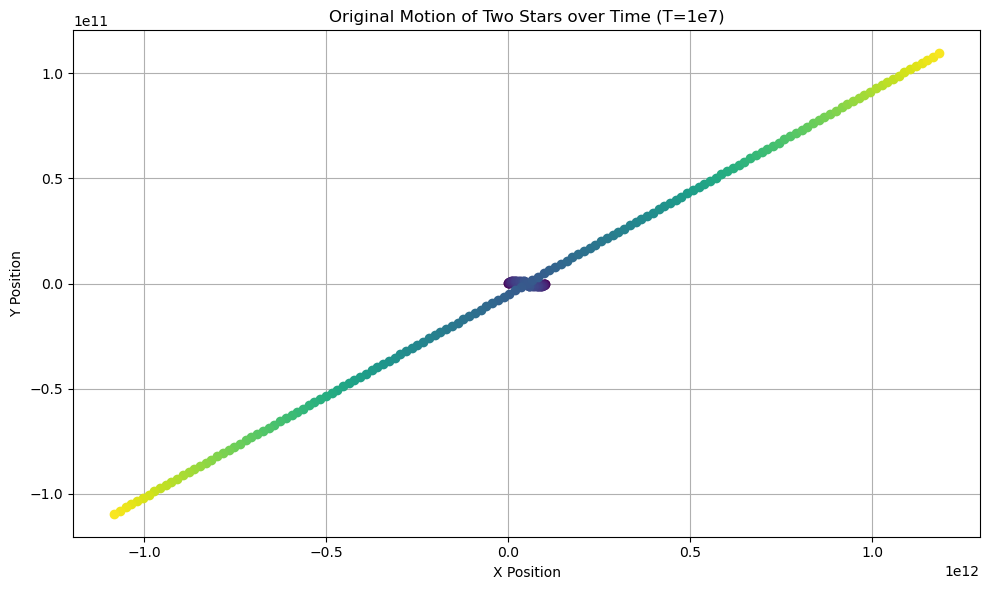

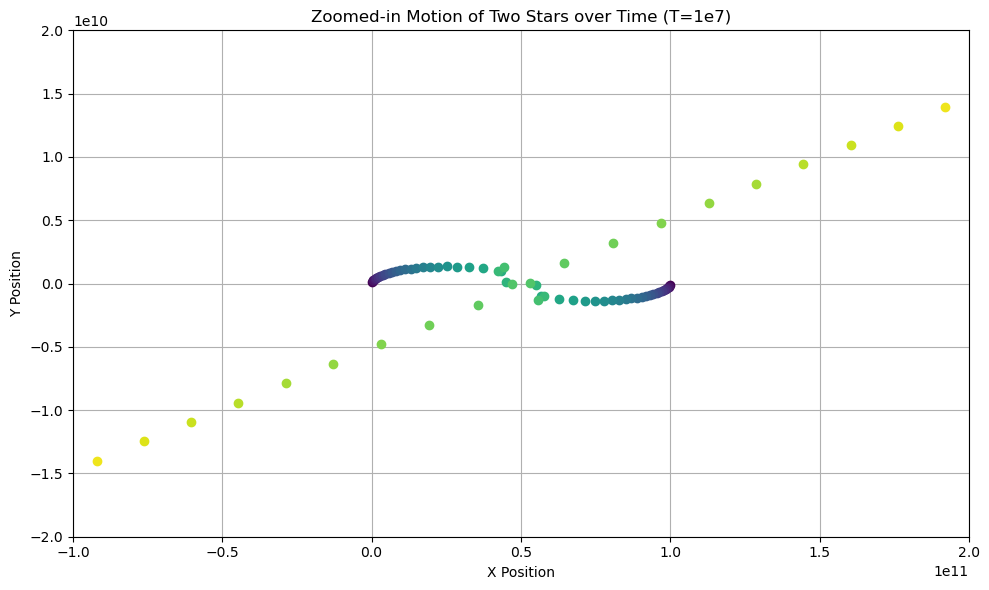

In [43]:
#plotting the original motion with a color gradient representing the progression of time
plt.figure(figsize=(10, 6))
num_points = len(positions)
for i, (r1_plot, r2_plot) in enumerate(positions):
    color = cm.viridis(i / num_points)
    plt.plot(r1_plot[0], r1_plot[1], 'o', color=color)
    plt.plot(r2_plot[0], r2_plot[1], 'o', color=color)

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Original Motion of Two Stars over Time (T=1e7)')
plt.grid(True)
plt.tight_layout()
plt.show()

#plotting the zoomed-in version with a color gradient representing the progression of time
plt.figure(figsize=(10, 6))
num_points_zoomed = len(zoomed_positions)
for i, (r1_plot, r2_plot) in enumerate(zoomed_positions):
    color = cm.viridis(i / num_points_zoomed)
    plt.plot(r1_plot[0], r1_plot[1], 'o', color=color)
    plt.plot(r2_plot[0], r2_plot[1], 'o', color=color)

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Zoomed-in Motion of Two Stars over Time (T=1e7)')
plt.grid(True)

#limits for x and y axes to zoom in
plt.xlim(-0.1e12, 0.2e12)
plt.ylim(-0.2e11, 0.2e11)

plt.tight_layout()
plt.show()